In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wemeet/filtered_data(2019).csv
/kaggle/input/wemeet/filtered_data(2018).csv
/kaggle/input/wemeet/filtered_data(2022).csv
/kaggle/input/wemeet/filtered_data(2020).csv
/kaggle/input/wemeet/filtered_data(2021).csv
/kaggle/input/wemeet/filtered_data(2013-2017).csv
/kaggle/input/sample-market/sample_onion.csv
/kaggle/input/sample-market/sample_cucumber.csv
/kaggle/input/sample-market/sample_radish.csv
/kaggle/input/sample-market/sample_lettuce.csv
/kaggle/input/sample-market/sample_pumpkin.csv
/kaggle/input/sample-market/sample_cabbage.csv
/kaggle/input/sample-market/sample_pear.csv
/kaggle/input/sample-market/sample_apple.csv
/kaggle/input/sample-market/sample_squash.csv
/kaggle/input/sample-apple/sample_apple.csv
/kaggle/input/sample-cabbage/sample_cabbage.csv


In [1]:
! python -m ensurepip --upgrade

Looking in links: /tmp/tmp_3hhmfiw
Requirement already up-to-date: setuptools in /opt/conda/lib/python3.7/site-packages (57.4.0)
Requirement already up-to-date: pip in /opt/conda/lib/python3.7/site-packages (21.2.4)


In [2]:
!pip install neuralprophet

     |████████████████████████████████| 114 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 208 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 5.6 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 887.5 MB 5.6 kB/s  eta 0:00:013
     |████████████████████████████████| 232 kB 62.2 MB/s eta 0:00:01
     |████████████████████████████████| 419 kB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 706 kB 76.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 50.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 25.8 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 15.2 MB 422 kB/s eta 0:00:01
     |████████████████████████████████| 270 kB 69.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 M

In [4]:
import pandas as pd
from neuralprophet import NeuralProphet

ContextualVersionConflict: (typing-extensions 3.7.4.3 (/opt/conda/lib/python3.7/site-packages), Requirement.parse('typing-extensions<5.0,>=4.0.0; python_version < "3.9"'), {'rich'})

In [26]:
market = pd.DataFrame()

In [6]:
apple = pd.read_csv('/kaggle/input/sample-market/sample_apple.csv', encoding = 'cp949')
cabbage = pd.read_csv('/kaggle/input/sample-market/sample_cabbage.csv', encoding = 'cp949')
cucumber = pd.read_csv('/kaggle/input/sample-market/sample_cucumber.csv', encoding = 'cp949')
lettuce = pd.read_csv('/kaggle/input/sample-market/sample_lettuce.csv', encoding = 'cp949')
onion = pd.read_csv('/kaggle/input/sample-market/sample_onion.csv', encoding = 'cp949')
pear = pd.read_csv('/kaggle/input/sample-market/sample_pear.csv', encoding = 'cp949')
pumpkin = pd.read_csv('/kaggle/input/sample-market/sample_pumpkin.csv', encoding = 'cp949')
radish = pd.read_csv('/kaggle/input/sample-market/sample_radish.csv', encoding = 'cp949')
squash = pd.read_csv('/kaggle/input/sample-market/sample_squash.csv', encoding = 'cp949')

In [9]:
apple.head()

,일련번호,점검일자(년),점검일자(월),점검일자(시간 순서),자치구 코드,자치구 이름,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,시장/마트 번호,시장/마트 이름,...,품목 정보(개수),품목 정보(원산지),품목 정보(생선 상태),품목 정보(달걀 크기),전처리 이전(년도-월),전처리 이전(점검일자),전처리 이전(품목 이름),전처리 이전(실판매규격),전처리 이전(비고),전처리 이전(가격(원))
0,1721905,2022,1,NaN,140000,중구,2,대형마트,56,롯데백화점,...,1.0,국내산,NaN,NaN,2022-01,2022-01-27,사과(부사),1개,"국내산,GAP,사과",4000
1,1722088,2022,1,NaN,170000,용산구,2,대형마트,63,농협 하나로마트 용산점,...,1.0,국내산,NaN,NaN,2022-01,2022-01-28,사과(부사),1개,"국내산 부사/1팩 3개 11,500원",3833
2,1722156,2022,1,NaN,170000,용산구,2,대형마트,6,이마트 용산점,...,1.0,NaN,NaN,NaN,2022-01,2022-01-28,사과(부사),1개,"밀양 얼음골사과/1팩 5~6 7,980원",1596
3,1722190,2022,1,NaN,200000,성동구,2,대형마트,75,이마트 성수점,...,1.0,국내산,NaN,NaN,2022-01,2022-01-27,사과,1개,국내산부사,1996
4,1722224,2022,1,NaN,200000,성동구,2,대형마트,74,이마트 왕십리점,...,1.0,국내산,NaN,NaN,2022-01,2022-01-27,사과(부사),1개,국내산부사,1980


In [10]:
df = apple[['전처리 이전(년도-월)', '품목 정보(개수)', '가격(원)']]

In [11]:
df = cabbage.groupby('전처리 이전(년도-월)')['가격(원)'].mean()
df

전처리 이전(년도-월)
2013-01    3816.285167
2013-02    3868.235721
2013-03    3870.884370
2013-04    3767.726844
2013-05    2878.125700
              ...     
2022-08    7440.831231
2022-09    9329.861469
2022-10    6851.629440
2022-11    3940.650659
2022-12    3375.135171
Name: 가격(원), Length: 119, dtype: float64

In [12]:
df.sort_index().index.values # 2020년 3월에 결측치 발생

df['2020-03'] = (df['2020-02'] + df['2020-04'])/2

In [13]:
df = df.reset_index()
df.columns = ['Month', 'Price']
df.Month = pd.to_datetime(df.Month)

df = df.set_index("Month").sort_index()
df.index.freq = 'MS'

df.head()

,Price
Month,
2013-01-01,3816.285167
2013-02-01,3868.235721
2013-03-01,3870.884370
2013-04-01,3767.726844
2013-05-01,2878.125700


In [14]:
df['ds'] = df.index

In [15]:
df.columns = ['y', 'ds']

In [13]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [16]:
train_data

NameError: name 'train_data' is not defined

In [27]:
# 모델 설정
model = NeuralProphet(seasonality_mode="additive", seasonality_reg=-10, learning_rate=0.15, epochs=1000, loss_func="Huber", 
                     normalize="standardize", num_hidden_layers=5)
# 훈련
loss = model.fit(df, freq="M")
# 예측용 데이터 프레임 만들기
df_pred = model.make_future_dataframe(df, periods=12)
# 예측
predict = model.predict(df_pred)

predict.index = predict['ds']

market.append(predict['yhat1'])

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
yhat1,4516.820312,4756.04541,4816.518555,4987.069336,4738.053711,4649.550293,5363.313477,6827.839844,7232.861816,5740.09668,4620.330078,4633.260742


In [32]:
market = predict['yhat1']


In [33]:
market

ds
2023-01-01    4516.820312
2023-02-01    4756.045410
2023-03-01    4816.518555
2023-04-01    4987.069336
2023-05-01    4738.053711
2023-06-01    4649.550293
2023-07-01    5363.313477
2023-08-01    6827.839844
2023-09-01    7232.861816
2023-10-01    5740.096680
2023-11-01    4620.330078
2023-12-01    4633.260742
Name: yhat1, dtype: float64

In [20]:
predict

,ds,y,yhat1,trend,season_yearly
ds,,,,,
2023-01-01,2023-01-01,None,4532.804688,5122.515625,-589.710876
2023-02-01,2023-02-01,None,4768.135742,5147.575684,-379.439880
2023-03-01,2023-03-01,None,4825.379395,5170.209961,-344.830231


<AxesSubplot:xlabel='ds'>

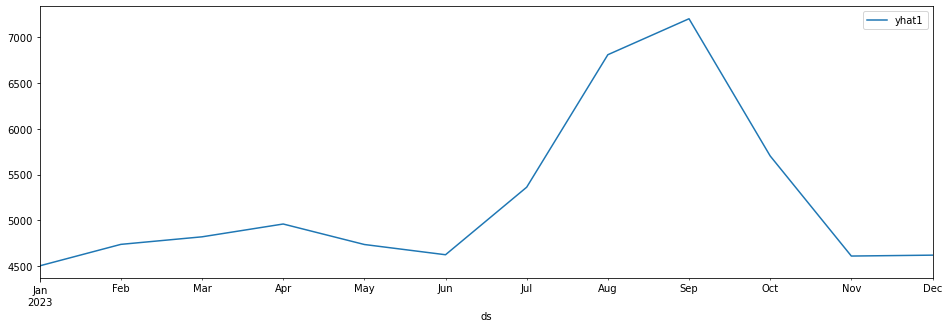

In [25]:
predict["yhat1"].plot(figsize = (16,5), legend=True)

In [23]:
test_data['y']

Month
2022-01-01    4371.994112
2022-02-01    4321.436223
2022-03-01    4372.970874
2022-04-01    4704.260571
2022-05-01    4905.216997
2022-06-01    4676.421634
2022-07-01    5975.069886
2022-08-01    7489.825529
2022-09-01    9796.695944
2022-10-01    6984.245004
2022-11-01    3923.383378
2022-12-01    3380.292420
Freq: MS, Name: y, dtype: float64

In [24]:
predict['yhat1']

ds
2022-01-01    4474.843262
2022-02-01    4643.573242
2022-03-01    4762.346191
2022-04-01    4892.702148
2022-05-01    4583.507324
2022-06-01    4513.324707
2022-07-01    5206.736816
2022-08-01    6848.147949
2022-09-01    7493.875977
2022-10-01    5836.973633
2022-11-01    4674.239746
2022-12-01    4771.932617
Name: yhat1, dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.sqrt(mean_squared_error(test_data['y'], predict['yhat1']))

1749.261556124799